In [4]:
#importing necessary libraries]
import quandl
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [8]:
# get adjusted closing prices of 50 selected companies with Quandl
quandl.ApiConfig.api_key = 'iwmMmvwxF_WbmJu3GzxY'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA', 'DIS', 'MA', 'MSFT', 'KO', 'FB', 'PG', 'NFLX', 'PYPL', 'MCD', 'ABT', 'VZ', 'INTC', 'CMCSA', 'C']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2018-12-31' }, paginate=True)
data.head()

""


In [5]:
# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table.head()

adj_close                                                         \
ticker            ABT          C      CMCSA        CNP        DIS          F   
date                                                                           
2014-01-02  34.904716  50.850962  24.150618  19.116238  72.783780  12.726742   
2014-01-03  35.279054  51.950285  23.972246  19.107861  72.631094  12.784441   
2014-01-06  35.744694  52.349154  23.948776  19.132992  72.354349  12.842140   
2014-01-07  35.470788  52.709109  24.798390  19.334039  72.850581  12.677286   
2014-01-08  35.790345  53.322006  24.760838  19.132992  71.781775  12.809169   

                                                                           \
ticker          FB         GE       INTC         KO         MA        MCD   
date                                                                        
2014-01-02  54.710  24.266002  22.703513  36.092891  81.084441  85.732885   
2014-01-03  54.557  24.248354  22.694710  35.915356  80.760741  85.848488   
2014-01-06  57.200  24.054226  22.413007  35.746698  80.360247  85.234903   
2014-01-07  57.920  24.080698  22.523047  35.853219  81.478131  85.706207   
2014-01-08  58.230  24.010106  22.386597  35.453765  81.453797  84.843632   

                                                                                
ticker           MSFT       NFLX         PG PYPL    TSLA         VZ        WMT  
date                                                                            
2014-01-02  33.532800  51.831429  70.956080  NaN  150.10  41.358045  71.343743  
2014-01-03  33.307202  51.871429  70.876789  NaN  149.56  40.868501  71.108673  
2014-01-06  32.603338  51.367143  71.044180  NaN  147.00  41.096392  70.710863  
2014-01-07  32.856007  48.500000  71.731363  NaN  149.36  41.611258  70.927850  
2014-01-08  32.269454  48.712857  70.691778  NaN  151.28  41.383367  70.367299

In [6]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250


# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 25000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(size=num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a dataframe of the portfolio
df = pd.DataFrame(portfolio)
df.tail()

,Returns,Volatility,CNP weight,F weight,WMT weight,GE weight,TSLA weight,DIS weight,MA weight,MSFT weight,...,FB weight,PG weight,NFLX weight,PYPL weight,MCD weight,ABT weight,VZ weight,INTC weight,CMCSA weight,C weight
24995,0.132009,0.128283,0.033458,0.069488,0.027665,0.086920,0.073176,0.028861,0.100057,0.060563,...,0.071588,0.041966,0.053108,0.021455,0.053492,0.088267,0.004792,0.014225,0.026236,0.073070
24996,0.164697,0.137957,0.079595,0.030740,0.009059,0.086870,0.038588,0.009281,0.090851,0.071850,...,0.078495,0.078490,0.071108,0.057147,0.077937,0.033494,0.044191,0.036638,0.037475,0.020557
24997,0.130367,0.138545,0.013005,0.104829,0.104533,0.000998,0.046961,0.051666,0.015837,0.093677,...,0.024289,0.055786,0.026077,0.095838,0.084631,0.105816,0.059560,0.005433,0.038800,0.070955
24998,0.141736,0.134191,0.082470,0.045465,0.018917,0.057068,0.066528,0.021597,0.060826,0.071034,...,0.080487,0.083113,0.050350,0.066194,0.022306,0.008537,0.069026,0.038053,0.078690,0.017050
24999,0.169498,0.142436,0.057109,0.013405,0.071298,0.001455,0.035529,0.088143,0.103572,0.002676,...,0.026245,0.095122,0.076176,0.036127,0.043651,0.032456,0.103625,0.039045,0.012727,0.102646


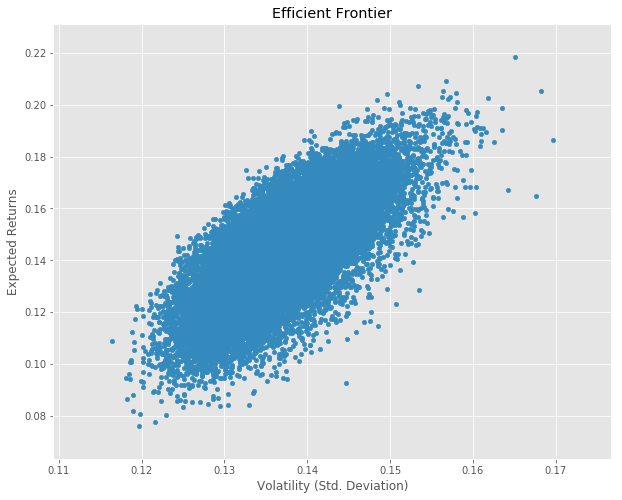

In [7]:
# plot the efficient frontier with a scatter plot
plt.style.use('ggplot')
df.plot(kind = 'scatter',x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()